<a href="https://colab.research.google.com/github/Beczheng/datasci_3_eda/blob/main/HHA_507_HW_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Installing packages

In [ ]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
from pandas_profiling import ProfileReport

# 2. Loading the dataset

In [ ]:
# Loading the dataset as a CSV file

df = pd.read_csv('healthcare_data_cleaning.csv')
df

,Patient Age,Gender,City of Residence,State of Residence,Has Insurance,Visited Last Month,Payment Method,Preferred Doctor,Disease Diagnosed,Medication Prescribed,Type of Appointment,Average Heart Rate,Average BP,Height (in cm),Weight (in kg),Payment Due ($),Last Visit (days ago),Visit Duration (mins),Number of Tests,Prescription Cost ($)
0,45,Other,West Brian,Kentucky,Yes,Yes,Insurance,Dr. Williams,Flu,Med_E,General,66,111,183,70,65.45721578126224,193,92,5,15.71751735532889
1,25,Female,East Jocelynfurt,Colorado,No,Yes,Card,Dr. Johnson,Flu,Med_B,Specialist,59,missing,174,58,430.68365678679174,195,missing,4,80.78647284463952
2,51,Other,South Lindseyland,Ohio,Yes,No,Cash,Dr. Williams,Covid-19,Med_D,General,79,119,161,56,315.0709305262176,missing,37,2,64.3921393009105
3,18,Female,Taylorfort,Pennsylvania,Yes,missing,Cash,Dr. Williams,Flu,Med_A,General,99,115,171,52,320.2998987723972,175,108,2,8.872859215315316
4,48,Female,Birdmouth,Montana,No,No,Insurance,Dr. Brown,None,Med_C,Specialist,93,89,186,87,264.2147372473319,188,113,3,77.48311304645532
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104995,74,Other,West Anthony,Oklahoma,Yes,No,Card,Dr. Williams,Covid-19,Med_E,Specialist,65,112,169,61,309.16444606680665,183,10,3,63.20478776719894
104996,37,Male,Mckeetown,Utah,Yes,No,Cash,Dr. Jones,Covid-19,Med_C,General,missing,111,165,67,missing,191,47,2,113.86764025370326
104997,51,Female,Lake Lisachester,Nebraska,Yes,Yes,Insurance,Dr. Williams,Allergy,Med_D,Follow-Up,89,118,179,71,320.8304180033907,172,39,3,35.622420232475356
104998,missing,Female,Heidiborough,missing,Yes,No,Cash,Dr. Smith,Covid-19,Med_A,Follow-Up,74,123,167,75,5.341231420036174,180,79,missing,124.4083409893742


In [ ]:
# Reducing the dataset to a sample size of 1,000

df2 = df.sample(1000)
df2

,Patient Age,Gender,City of Residence,State of Residence,Has Insurance,Visited Last Month,Payment Method,Preferred Doctor,Disease Diagnosed,Medication Prescribed,Type of Appointment,Average Heart Rate,Average BP,Height (in cm),Weight (in kg),Payment Due ($),Last Visit (days ago),Visit Duration (mins),Number of Tests,Prescription Cost ($)
39663,33,Other,Roberttown,missing,No,Yes,Cash,Dr. Smith,None,Med_C,Specialist,88,129,168,71,435.08709976575636,169,71,6,105.17130583223292
16418,31,Male,Theresafurt,Florida,Yes,No,Insurance,Dr. Williams,Cold,Med_A,General,73,120,176,77,412.46250750334775,171,25,missing,135.66835010347268
72079,32,Female,missing,Arizona,Yes,No,Card,Dr. Brown,None,Med_B,General,79,106,180,83,389.10774525425506,180,120,3,146.66823702203266
66982,48,Other,missing,Nebraska,Yes,Yes,Insurance,Dr. Jones,Covid-19,Med_D,Follow-Up,84,108,164,45,104.96859744964482,178,92,4,5.162036917901597
57359,41,Female,Port Joan,Vermont,Yes,Yes,Cash,Dr. Jones,missing,Med_E,General,83,111,177,41,missing,190,116,3,44.02579251845219
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29765,39,Female,Fosterside,Missouri,No,No,missing,Dr. Jones,Allergy,Med_B,Follow-Up,61,127,181,75,207.85652866141797,182,49,2,78.5958847305967
8975,40,Female,Ericberg,North Dakota,Yes,Yes,Insurance,Dr. Brown,Flu,Med_C,Specialist,68,118,176,64,154.85587387284588,211,101,6,99.23476699803356
68284,55,Other,Murilloside,Michigan,Yes,Yes,Insurance,missing,None,Med_E,General,missing,95,196,75,153.6907169990626,186,37,1,26.040947428062516
42207,55,Other,West Mirandatown,Oklahoma,No,Yes,Insurance,missing,Cold,Med_D,General,69,123,174,76,166.76258651258934,195,77,5,40.48711958968521


# 3. Cleaning the dataset

## Removing duplicates

In [ ]:
# Removing duplicates in the dataset

df3 = df2.drop_duplicates()
df3

,Patient Age,Gender,City of Residence,State of Residence,Has Insurance,Visited Last Month,Payment Method,Preferred Doctor,Disease Diagnosed,Medication Prescribed,Type of Appointment,Average Heart Rate,Average BP,Height (in cm),Weight (in kg),Payment Due ($),Last Visit (days ago),Visit Duration (mins),Number of Tests,Prescription Cost ($)
39663,33,Other,Roberttown,missing,No,Yes,Cash,Dr. Smith,None,Med_C,Specialist,88,129,168,71,435.08709976575636,169,71,6,105.17130583223292
16418,31,Male,Theresafurt,Florida,Yes,No,Insurance,Dr. Williams,Cold,Med_A,General,73,120,176,77,412.46250750334775,171,25,missing,135.66835010347268
72079,32,Female,missing,Arizona,Yes,No,Card,Dr. Brown,None,Med_B,General,79,106,180,83,389.10774525425506,180,120,3,146.66823702203266
66982,48,Other,missing,Nebraska,Yes,Yes,Insurance,Dr. Jones,Covid-19,Med_D,Follow-Up,84,108,164,45,104.96859744964482,178,92,4,5.162036917901597
57359,41,Female,Port Joan,Vermont,Yes,Yes,Cash,Dr. Jones,missing,Med_E,General,83,111,177,41,missing,190,116,3,44.02579251845219
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29765,39,Female,Fosterside,Missouri,No,No,missing,Dr. Jones,Allergy,Med_B,Follow-Up,61,127,181,75,207.85652866141797,182,49,2,78.5958847305967
8975,40,Female,Ericberg,North Dakota,Yes,Yes,Insurance,Dr. Brown,Flu,Med_C,Specialist,68,118,176,64,154.85587387284588,211,101,6,99.23476699803356
68284,55,Other,Murilloside,Michigan,Yes,Yes,Insurance,missing,None,Med_E,General,missing,95,196,75,153.6907169990626,186,37,1,26.040947428062516
42207,55,Other,West Mirandatown,Oklahoma,No,Yes,Insurance,missing,Cold,Med_D,General,69,123,174,76,166.76258651258934,195,77,5,40.48711958968521


## Renaming missing values

In [ ]:
# Renaming missing values from "missing" to "NA" in the dataset

df4 = df3.replace('missing', np.nan)
df4

,Patient Age,Gender,City of Residence,State of Residence,Has Insurance,Visited Last Month,Payment Method,Preferred Doctor,Disease Diagnosed,Medication Prescribed,Type of Appointment,Average Heart Rate,Average BP,Height (in cm),Weight (in kg),Payment Due ($),Last Visit (days ago),Visit Duration (mins),Number of Tests,Prescription Cost ($)
39663,33,Other,Roberttown,NaN,No,Yes,Cash,Dr. Smith,None,Med_C,Specialist,88,129,168,71,435.08709976575636,169,71,6,105.17130583223292
16418,31,Male,Theresafurt,Florida,Yes,No,Insurance,Dr. Williams,Cold,Med_A,General,73,120,176,77,412.46250750334775,171,25,NaN,135.66835010347268
72079,32,Female,NaN,Arizona,Yes,No,Card,Dr. Brown,None,Med_B,General,79,106,180,83,389.10774525425506,180,120,3,146.66823702203266
66982,48,Other,NaN,Nebraska,Yes,Yes,Insurance,Dr. Jones,Covid-19,Med_D,Follow-Up,84,108,164,45,104.96859744964482,178,92,4,5.162036917901597
57359,41,Female,Port Joan,Vermont,Yes,Yes,Cash,Dr. Jones,NaN,Med_E,General,83,111,177,41,NaN,190,116,3,44.02579251845219
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29765,39,Female,Fosterside,Missouri,No,No,NaN,Dr. Jones,Allergy,Med_B,Follow-Up,61,127,181,75,207.85652866141797,182,49,2,78.5958847305967
8975,40,Female,Ericberg,North Dakota,Yes,Yes,Insurance,Dr. Brown,Flu,Med_C,Specialist,68,118,176,64,154.85587387284588,211,101,6,99.23476699803356
68284,55,Other,Murilloside,Michigan,Yes,Yes,Insurance,NaN,None,Med_E,General,NaN,95,196,75,153.6907169990626,186,37,1,26.040947428062516
42207,55,Other,West Mirandatown,Oklahoma,No,Yes,Insurance,NaN,Cold,Med_D,General,69,123,174,76,166.76258651258934,195,77,5,40.48711958968521


## Dropping missing values

In [ ]:
# Dropping missing values in the dataset

df5 = df4.dropna()
df5

,Patient Age,Gender,City of Residence,State of Residence,Has Insurance,Visited Last Month,Payment Method,Preferred Doctor,Disease Diagnosed,Medication Prescribed,Type of Appointment,Average Heart Rate,Average BP,Height (in cm),Weight (in kg),Payment Due ($),Last Visit (days ago),Visit Duration (mins),Number of Tests,Prescription Cost ($)
79614,18,Male,North Julieland,Vermont,Yes,No,Cash,Dr. Johnson,None,Med_B,Emergency,57,107,188,63,398.8645541757141,177,11,5,108.42863666565667
32210,56,Male,Emmatown,Connecticut,No,Yes,Card,Dr. Williams,Flu,Med_A,Emergency,70,113,177,84,411.9440561268056,189,19,5,78.68179417044135
53078,71,Female,South Melissa,Oregon,Yes,Yes,Cash,Dr. Brown,Covid-19,Med_B,General,90,118,148,90,43.61179093556367,180,12,6,23.316717612185627
71976,60,Male,Hamptontown,North Dakota,Yes,Yes,Card,Dr. Brown,Cold,Med_C,Follow-Up,69,122,171,51,282.38242639884754,198,32,4,70.43744427899895
20034,53,Male,North Sierraview,Maryland,Yes,Yes,Insurance,Dr. Brown,Covid-19,Med_D,Follow-Up,83,95,180,76,447.5440119706905,179,116,4,96.55864008886802
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39251,28,Male,Kristinport,Oregon,No,No,Cash,Dr. Smith,Flu,Med_E,Emergency,93,114,181,62,217.58532937799342,189,56,6,79.70378443819558
92538,63,Female,East Stephen,South Carolina,No,Yes,Cash,Dr. Brown,Flu,Med_E,General,78,114,168,86,108.21351687700553,174,43,3,52.504873409025976
71819,73,Female,Justinborough,Hawaii,Yes,No,Insurance,Dr. Smith,Flu,Med_E,Follow-Up,68,122,164,77,396.88584817653697,173,50,3,135.53601342117057
8975,40,Female,Ericberg,North Dakota,Yes,Yes,Insurance,Dr. Brown,Flu,Med_C,Specialist,68,118,176,64,154.85587387284588,211,101,6,99.23476699803356


## Cleaning the columns

In [ ]:
# Cleaning the columns by removing white space and special characters

def clean_column(df):
  def clean_name(name):
        cleaned_name = re.sub(r'[^a-zA-Z0-9]', '', name)
        return cleaned_name.lower()

  df.columns = [clean_name(col) for col in df.columns]
  return df

df6 = clean_column(df5)
df6

,patientage,gender,cityofresidence,stateofresidence,hasinsurance,visitedlastmonth,paymentmethod,preferreddoctor,diseasediagnosed,medicationprescribed,typeofappointment,averageheartrate,averagebp,heightincm,weightinkg,paymentdue,lastvisitdaysago,visitdurationmins,numberoftests,prescriptioncost
79614,18,Male,North Julieland,Vermont,Yes,No,Cash,Dr. Johnson,None,Med_B,Emergency,57,107,188,63,398.8645541757141,177,11,5,108.42863666565667
32210,56,Male,Emmatown,Connecticut,No,Yes,Card,Dr. Williams,Flu,Med_A,Emergency,70,113,177,84,411.9440561268056,189,19,5,78.68179417044135
53078,71,Female,South Melissa,Oregon,Yes,Yes,Cash,Dr. Brown,Covid-19,Med_B,General,90,118,148,90,43.61179093556367,180,12,6,23.316717612185627
71976,60,Male,Hamptontown,North Dakota,Yes,Yes,Card,Dr. Brown,Cold,Med_C,Follow-Up,69,122,171,51,282.38242639884754,198,32,4,70.43744427899895
20034,53,Male,North Sierraview,Maryland,Yes,Yes,Insurance,Dr. Brown,Covid-19,Med_D,Follow-Up,83,95,180,76,447.5440119706905,179,116,4,96.55864008886802
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39251,28,Male,Kristinport,Oregon,No,No,Cash,Dr. Smith,Flu,Med_E,Emergency,93,114,181,62,217.58532937799342,189,56,6,79.70378443819558
92538,63,Female,East Stephen,South Carolina,No,Yes,Cash,Dr. Brown,Flu,Med_E,General,78,114,168,86,108.21351687700553,174,43,3,52.504873409025976
71819,73,Female,Justinborough,Hawaii,Yes,No,Insurance,Dr. Smith,Flu,Med_E,Follow-Up,68,122,164,77,396.88584817653697,173,50,3,135.53601342117057
8975,40,Female,Ericberg,North Dakota,Yes,Yes,Insurance,Dr. Brown,Flu,Med_C,Specialist,68,118,176,64,154.85587387284588,211,101,6,99.23476699803356


In [ ]:
# Renaming the column headers

df7 = df6.rename(columns = {'patientage' : 'patient_age', 'cityofresidence' : 'city', 'stateofresidence' : 'state', 'hasinsurance' : 'has_insurance', 'visitedlastmonth' : 'visited_last_month', 'paymentmethod' : 'payment_method', 'preferreddoctor' : 'preferred_doctor', 'diseasediagnosed' : 'disease_diagnosed', 'medicationprescribed' : 'medication_prescribed', 'typeofappointment' : 'type_of_appointment', 'averageheartrate' : 'average_hr', 'averagebp' : 'average_bp', 'heightincm': 'height_in_cm', 'weightinkg' : 'weight_in_kg', 'paymentdue' : 'payment_due', 'lastvisitdaysago' : 'last_visit_in_days_ago', 'visitdurationmins' : 'visit_duration_in_mins', 'numberoftests' : 'number_of_tests', 'prescriptioncost' : 'prescription_cost'})
df7

,patient_age,gender,city,state,has_insurance,visited_last_month,payment_method,preferred_doctor,disease_diagnosed,medication_prescribed,type_of_appointment,average_hr,average_bp,height_in_cm,weight_in_kg,payment_due,last_visit_in_days_ago,visit_duration_in_mins,number_of_tests,prescription_cost
79614,18,Male,North Julieland,Vermont,Yes,No,Cash,Dr. Johnson,None,Med_B,Emergency,57,107,188,63,398.8645541757141,177,11,5,108.42863666565667
32210,56,Male,Emmatown,Connecticut,No,Yes,Card,Dr. Williams,Flu,Med_A,Emergency,70,113,177,84,411.9440561268056,189,19,5,78.68179417044135
53078,71,Female,South Melissa,Oregon,Yes,Yes,Cash,Dr. Brown,Covid-19,Med_B,General,90,118,148,90,43.61179093556367,180,12,6,23.316717612185627
71976,60,Male,Hamptontown,North Dakota,Yes,Yes,Card,Dr. Brown,Cold,Med_C,Follow-Up,69,122,171,51,282.38242639884754,198,32,4,70.43744427899895
20034,53,Male,North Sierraview,Maryland,Yes,Yes,Insurance,Dr. Brown,Covid-19,Med_D,Follow-Up,83,95,180,76,447.5440119706905,179,116,4,96.55864008886802
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39251,28,Male,Kristinport,Oregon,No,No,Cash,Dr. Smith,Flu,Med_E,Emergency,93,114,181,62,217.58532937799342,189,56,6,79.70378443819558
92538,63,Female,East Stephen,South Carolina,No,Yes,Cash,Dr. Brown,Flu,Med_E,General,78,114,168,86,108.21351687700553,174,43,3,52.504873409025976
71819,73,Female,Justinborough,Hawaii,Yes,No,Insurance,Dr. Smith,Flu,Med_E,Follow-Up,68,122,164,77,396.88584817653697,173,50,3,135.53601342117057
8975,40,Female,Ericberg,North Dakota,Yes,Yes,Insurance,Dr. Brown,Flu,Med_C,Specialist,68,118,176,64,154.85587387284588,211,101,6,99.23476699803356


# 4. Conducting univariate analyses

## Checking and changing the data type

In [ ]:
# Checking the data type for the "average_hr" and "average_bp" columns

df7[['average_hr', 'average_bp']].dtypes

average_hr    object
average_bp    object
dtype: object

In [ ]:
# Changing the data type to numeric for the "average_hr" and "average_bp" columns

df7[['average_hr', 'average_bp']] = df7[['average_hr', 'average_bp']].apply(pd.to_numeric)
print(df7[['average_hr', 'average_bp']])

       average_hr  average_bp
79614          57         107
32210          70         113
53078          90         118
71976          69         122
20034          83          95
...           ...         ...
39251          93         114
92538          78         114
71819          68         122
8975           68         118
22158          80         120

[372 rows x 2 columns]


In [ ]:
# Checking the data type for the "average_hr" and "average_bp" columns again

df7[['average_hr', 'average_bp']].dtypes

average_hr    int64
average_bp    int64
dtype: object

## Summary statistics

In [ ]:
# Conducting summary statistics for average heart rate ("average_hr") and average blood pressure ("average_bp")

print('Summary statistics:')
print(df7[['average_hr', 'average_bp']].describe())

Summary statistics:
       average_hr  average_bp
count  372.000000  372.000000
mean    79.392473  109.505376
std      9.882695   14.523611
min     53.000000   80.000000
25%     72.000000   98.000000
50%     80.000000  111.000000
75%     86.000000  120.000000
max    109.000000  140.000000


## Measures of central tendency

In [ ]:
# Calculating measures of central tendency (mean, median, and mode) for average heart rate

mean_value_average_hr = df7['average_hr'].mean()
median_value_average_hr = df7['average_hr'].median()
mode_value_average_hr = df7['average_hr'].mode().iloc[0]

# Calculating measures of central tendency (mean, median, and mode) for average blood pressure

mean_value_average_bp = df7['average_bp'].mean()
median_value_average_bp = df7['average_bp'].median()
mode_value_average_bp = df7['average_bp'].mode().iloc[0]

In [ ]:
# Printing the results of the measures of central tendency for average heart rate

print('Mean for average heart rate:', mean_value_average_hr)
print('Median for average heart rate:', median_value_average_hr)
print('Mode for average heart rate:', mode_value_average_hr)

Mean for average heart rate: 79.39247311827957
Median for average heart rate: 80.0
Mode for average heart rate: 86


In [ ]:
# Printing the results of the measures of central tendency for average blood pressure

print('Mean for average blood pressure:', mean_value_average_bp)
print('Median for average blood pressure:', median_value_average_bp)
print('Mode for average blood pressure:', mode_value_average_bp)

Mean for average blood pressure: 109.50537634408602
Median for average blood pressure: 111.0
Mode for average blood pressure: 111


## Measures of spread

In [ ]:
# Calculating measures of spread (range, variance, standard deviation, and percentiles) for average heart rate

range_average_hr = df7['average_hr'].max() - df7['average_hr'].min()
var_average_hr = np.var(df7['average_hr'])
std_average_hr = np.std(df7['average_hr'])
percentile_25_average_hr = np.percentile(df7['average_hr'], 25)
percentile_75_average_hr = np.percentile(df7['average_hr'], 75)

# Calculating IQR for average heart rate

q1_average_hr = np.percentile(df7['average_hr'], 25)
q3_average_hr = np.percentile(df7['average_hr'], 75)
iqr_average_hr = q3_average_hr - q1_average_hr

# Calculating measures of spread (range, variance, standard deviation, and percentiles) for average blood pressure

range_average_bp = df7['average_bp'].max() - df7['average_bp'].min()
var_average_bp = np.var(df7['average_bp'])
std_average_bp = np.std(df7['average_bp'])
percentile_25_average_bp = np.percentile(df7['average_bp'], 25)
percentile_75_average_bp = np.percentile(df7['average_bp'], 75)

# Calculating IQR for average blood pressure

q1_average_bp = np.percentile(df7['average_bp'], 25)
q3_average_bp = np.percentile(df7['average_bp'], 75)
iqr_average_bp = q3_average_bp - q1_average_bp

In [ ]:
# Printing the results of the measures of spread for average heart rate

print('Range for average heart rate:', range_average_hr)
print('Variance for average heart rate:', var_average_hr)
print('Standard deviation for average heart rate:', std_average_hr)
print('25th percentile for average heart rate:', percentile_25_average_hr)
print('75th percentile for average heart rate:', percentile_75_average_hr)
print('IQR for average heart rate:', iqr_average_hr)

Range for average heart rate: 56
Variance for average heart rate: 97.40510463637416
Standard deviation for average heart rate: 9.869402445760034
25th percentile for average heart rate: 72.0
75th percentile for average heart rate: 86.0
IQR for average heart rate: 14.0


In [ ]:
# Printing the results of the measures of spread for for average blood pressure

print('Range for average blood pressure:', range_average_bp)
print('Variance for average blood pressure:', var_average_bp)
print('Standard deviation for average blood pressure:', std_average_bp)
print('25th percentile for average blood pressure:', percentile_25_average_bp)
print('75th percentile for average blood pressure:', percentile_75_average_bp)
print('IQR for average blood pressure:', iqr_average_bp)

Range for average blood pressure: 60
Variance for average blood pressure: 210.36825066481674
Standard deviation for average blood pressure: 14.504077035951537
25th percentile for average blood pressure: 98.0
75th percentile for average blood pressure: 120.0
IQR for average blood pressure: 22.0


## Graphs

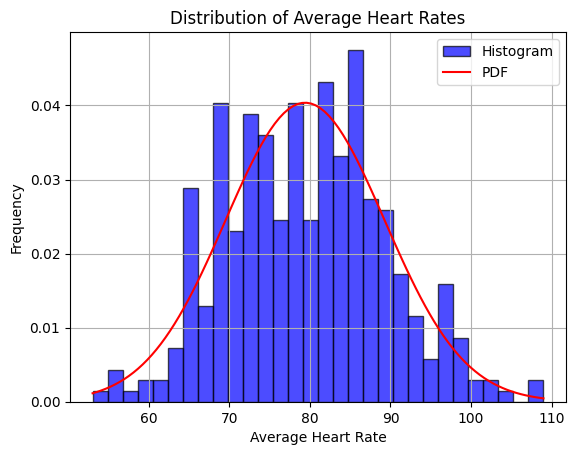

In [ ]:
# Visualizing distribution of average heart rates through a histogram

# Normal distribution

mean = 79.392473
std_dev = 9.882695
num_samples = 372

# Creating a histogram

plt.hist(df7['average_hr'], bins=30, density=True, alpha=0.7, color='blue', edgecolor='black', label='Histogram')

# Create a probability density function (PDF) curve

x = np.linspace(min(df7['average_hr']), max(df7['average_hr']), 100)
pdf = (1/(std_dev * np.sqrt(2*np.pi))) * np.exp(-(x - mean)**2 / (2*std_dev**2))
plt.plot(x, pdf, color='red', label='PDF')

plt.title('Distribution of Average Heart Rates')
plt.xlabel('Average Heart Rate')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

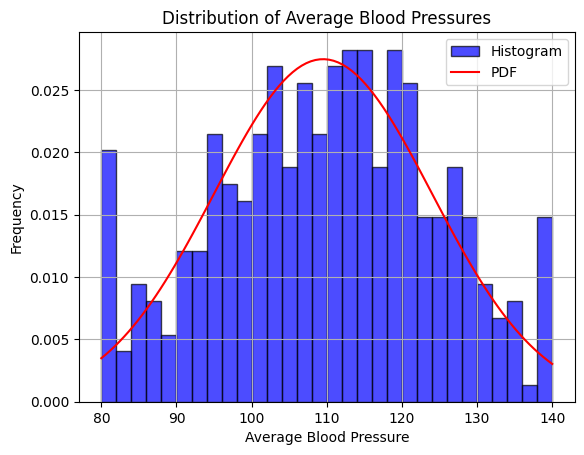

In [ ]:
# Visualizing distribution of average blood pressures through a histogram

# Normal distribution

mean = 109.505376
std_dev = 14.523611
num_samples = 372

# Creating a histogram

plt.hist(df7['average_bp'], bins=30, density=True, alpha=0.7, color='blue', edgecolor='black', label='Histogram')

# Create a probability density function (PDF) curve

x = np.linspace(min(df7['average_bp']), max(df7['average_bp']), 100)
pdf = (1/(std_dev * np.sqrt(2*np.pi))) * np.exp(-(x - mean)**2 / (2*std_dev**2))
plt.plot(x, pdf, color='red', label='PDF')

plt.title('Distribution of Average Blood Pressures')
plt.xlabel('Average Blood Pressure')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

# 5. Conducting bivariate analyses

## Calculating and analyzing correlations

In [ ]:
# Calculating correlation between average heart rate and average blood pressure using the Pearson correlation coefficient
# Calculating the p value

pearson_corr, p_value = pearsonr(df7['average_hr'], df7['average_bp'])

In [ ]:
# Printing the result of the correlation

print(f'Pearson correlation coefficient: {pearson_corr:.4f}')

# Printing the result of the p value

print(f'P-value: {p_value:.4f}')

Pearson correlation coefficient: -0.0575
P-value: 0.2690


In [ ]:
# Analyzing the result of the correlation

def p_corr_function(x):
  if abs(x) >= 0.9 and abs(x) <= 1.0:
    result = 'Very strong correlation'
  elif abs(x) >= 0.7 and abs(x) < 0.9:
    result = 'Strong correlation'
  elif abs(x) >= 0.5 and abs(x) < 0.7:
    result = 'Moderate correlation'
  elif abs(x) >= 0.3 and abs(x) < 0.5:
    result = 'Weak correlation'
  else:
    result = 'Very weak correlation'
  return result

p_corr_analysis = p_corr_function(-0.0575)
print('Analysis of the correlation:', p_corr_analysis)

Analysis of the correlation: Very weak correlation


## Calculating and analyzing covariance

In [ ]:
# Calculating covariance between average heart rate and average blood pressure

covariance = df7['average_hr'].cov(df7['average_bp'])

In [ ]:
# Printing the result of the covariance

print(f'Covariance: {covariance: .4f}')

Covariance: -8.2474


In [ ]:
# Analyzing the result of the covariance

def covariance_function(x):
  if x > 0:
    result = 'Positive covariance'
  elif x < 0:
    result = 'Negative covariance'
  else:
    result = 'Covariance of 0.'
  return result

covariance_analysis = covariance_function(-8.2474)
print('Analysis of the covariance:', covariance_analysis)

Analysis of the covariance: Negative covariance


## Graphs

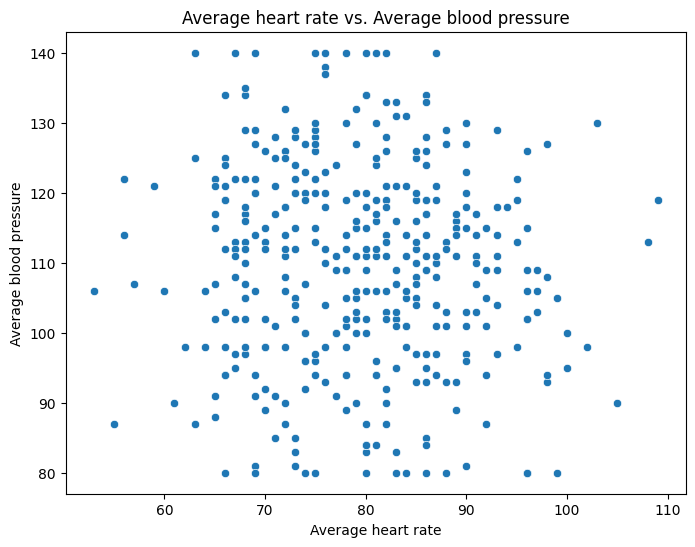

In [ ]:
# Visualizing average heart rate and average blood pressure through a scatterplot

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df7, x='average_hr', y='average_bp')
plt.title('Average heart rate vs. Average blood pressure')
plt.xlabel('Average heart rate')
plt.ylabel('Average blood pressure')
plt.show()

# 6. Outliers

## Identifying outliers using the IQR method

In [ ]:
# Identifying outliers for average heart rate

# Calculating quartiles and IQR

q1_average_hr = np.percentile(df7['average_hr'], 25)
q3_average_hr = np.percentile(df7['average_hr'], 75)
iqr_average_hr = q3_average_hr - q1_average_hr

# Setting threshold for outlier detection

threshold_lower_average_hr = q1_average_hr - 1.5 * iqr_average_hr
threshold_upper_average_hr = q3_average_hr + 1.5 * iqr_average_hr

# Identifying outliers

outliers_average_hr = [x for x in df7['average_hr'] if x < threshold_lower_average_hr or x > threshold_upper_average_hr]

# Printing outliers

outliers_list_average_hr = outliers_average_hr
outliers_list_average_hr.sort()
print(outliers_list_average_hr)

[108, 109]


In [ ]:
# Identifying outliers for average blood pressure

# Calculating quartiles and IQR

q1_average_bp = np.percentile(df7['average_bp'], 25)
q3_average_bp = np.percentile(df7['average_bp'], 75)
iqr_average_bp = q3_average_bp - q1_average_bp

# Setting threshold for outlier detection

threshold_lower_average_bp = q1_average_bp - 1.5 * iqr_average_bp
threshold_upper_average_bp = q3_average_bp + 1.5 * iqr_average_bp

# Identifying outliers

outliers_average_bp = [x for x in df7['average_bp'] if x < threshold_lower_average_bp or x > threshold_upper_average_bp]

# Printing outliers

outliers_list_average_bp = outliers_average_bp
outliers_list_average_bp.sort()
print(outliers_list_average_bp)

[]


## Handling outliers

**Rationale:** I will include the outliers in my data because the information could be important in assessing the patients' health status. It appears these outliers are not due to data entry errors or measurement issues.

# 7. Automated analysis

## Producing an EDA report

**Note:** Due to the size of the original dataset and the capabilities of pandas_profiling, the dataset was reduced to a sample size of 1,000.

In [ ]:
# Producing an EDA report as an html file

report = ProfileReport(df7)
report.to_file('eda_report.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]